# HateSpeech Detection in gujarati

# Imports

In [1]:
import pandas as pd
import numpy as np
import re
import emoji
import string
import csv
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import pickle

# DataSet

In [2]:
data = pd.read_csv(r'C:\Users\Dhruv.DHRUVPC\Gujarati_NLP.csv')
data.head()

,ID,Post,Labels,Simple_Labels,SubCategory,"Simple_Labels,SubCategory",Unnamed: 6,Unnamed: 7
0,1,બંન્ને કેવી ગાળો બોલે .. કોય ને સાથ ના આપતા..આ...,"""Non-Hate"",""Neutral""",Non-Hate,Neutral,"Non-Hate,Neutral","""Non-Hate""","""Neutral"""
1,2,જય જય ગરવી ગુજરાત,"""Non-Hate"",""Positive""",Non-Hate,Positive,"Non-Hate,Positive","""Non-Hate""","""Positive"""
2,3,કચ્છમાં ખંડણી માટે ફાયરિંગ કરીને હત્યા નિપજાવા...,"""Non-Hate"",""Neutral""",Non-Hate,Neutral,"Non-Hate,Neutral","""Non-Hate""","""Neutral"""
3,4,આજે સમગ્ર વિસ્તારમાં ઠંડકનો માહોલ જોવા મળ્યો હ...,"""Non-Hate"",""Positive""",Non-Hate,Positive,"Non-Hate,Positive","""Non-Hate""","""Positive"""
4,5,પાટીદાર અનામત આંદોલનકારીઓએ હવે રાજય સરકાર સામે...,"""Non-Hate"",""Neutral""",Non-Hate,Neutral,"Non-Hate,Neutral","""Non-Hate""","""Neutral"""


In [3]:
data["Post"][0]

'બંન્ને કેવી ગાળો બોલે .. કોય ને સાથ ના આપતા..આપડે તો ખાલી જોવા થીજ મતલબ 😀😀😀😀😂😀😀😀😂😀😀😀😀😂😀😂😂😂😂😂😂👍👍👍'

# Text Cleanning - Data Pre-Processing

In [4]:
STOPWORDS = ['અથવા', 'અને', 'અમને', 'અમારું', 'અમે ', 'અહીં', 'આ ', 'આગળ', 'આથી', 'આનું', 'આને', 'આપણને', 'આપણું', 'આપણે',
             'આપી', 'આવી', 'આવે', 'ઉપર', 'ઊંચે', 'ઊભું', 'એ', 'એક','એના','એનાં','એની','એનું','એને','એનો','એમ','એવા','એવાં',
             'એવી','એવું','એવો','ઓછું','અંગે','અંદર','કઈ','કયું','કયો','કરવું','કરતાં','કરી','કરીએ','કરું','કરે','કરેલું', 'કર્યા','કર્યાં','કર્યું',
             'કર્યો','કંઈક','કાંઈ','કે','કેટલું','કેમ','કેવી','કેવું ','કોઈ','કોઈક','કોણ','કોણે','કોને','ક્યારે','ક્યાં','ખૂબ ','ગઈ ','ગયા ','ગયાં'
             ,'ગયું ','ગયો','ઘણું','છ ','છતાં','છીએ', 'છું ','છે','છેક','છો','જ','જાય','જી','જે','જેટલું','જેને','જેમ','જેવી','જેવું','જેવો','જો',
             'જોઈએ','જ્યારે','જ્યાં ','ઝાઝું','તને ','તમને','તમારું' ,'તમે ','તારાથી ','તારામાં','તારું','તું ','તે ','તેઓ ','તેથી ','તેણે ','તેના '
             ,'તેની','તેનું ','તેને','તેમ','તેમનું','તેમને','તેવી','તેવું','તેં','તો ','ત્યારે','ત્યાં','થઈ','થઈએ' ,'થતા ','થતાં','થતી ','થતું','થતો',
             'થયા ','થયાં','થયું ','થયો','થયેલું','થવું ','થાઉં','થાઓ','થાય','થોડું','દરેક','ન','નથી' ,'નહિ' ,'નહીં' ,'નં.' ,'ના' ,'નીચે' ,
             'ને' ,'પછી' ,'પણ' ,'પર' ,'પરંતુ','પહેલાં','પાછળ' ,'પાસે' ,'પોતાનું' ,'પ્રત્યેક' ,'ફક્ત' ,'ફરી' ,'ફરીથી' ,'બધા' ,'બધું','બની' ,
             'બહાર' ,'બહુ' ,'બંને' ,'બાદ' ,'બે' ,'મને' ,'મા' ,'માટે' ,'માત્ર' ,'મારું' ',મૂકવું' ',મૂકી' ',મૂક્યા' ',મૂક્યાં' ,'મૂક્યું' ,'મેં' ,'રહી',
             'રહે' ,'રહેવું','રહ્યા','રહ્યાં','રહ્યો' ,'રીતે' ,'રૂ.','લેતા','લેતું' ,'લેવા','વગેરે' ,'વધુ' ,'શકે' ,'શા' ,'શું' ,'સરખું' ,'સામે' ,'સુધી'
             ,'હતા' ,'હતાં' ,'હતી' ,'હતું' ,'હશે','હશો' ,'હવે' ,'હા' ,'હું','હો' ,'હોઈ' ,'હોઈશ' ,'હોઈશું' ,'હોય','હોવા','+',  'ોરોના', '્ઓલખી', 'ૐ', '૦૪', '૧', '૧માંથી', '૧મૈજર', '૧૦', '૧૦૦', '૧૦૦૦', '૧૦૦૦રુ', '૧૦૦૧૦૦', '૧૦૯', '૧૧૦','%', '&', "''", '(', ')', '+સિકયુરિટ', ';', '<', '>', '``', 'à', 'अकाउंट', 'असली', 'आरंमिहु', 'औरंगजेब', 'काम', 'जयहींद', 'थी', 'ने', 'पर', 'बदले', 'भाई', 'मतलब', 'मालिक','અ', 'मे', 'या', 'वर्ष', 'वाह', 'साथ', '૧૨', '૧૨૦કૅરોર', '૧૩૦', '૧૩૫', '૧૪', '૧૫', '૧૫લાખ', '૧૫૦', '૧૬', '૧૮૮', '૧૯૮૦', '૨', '૨૦', '૨૦૦', '૨૦૧૨', '૨૦૧૩', '૨૦૧૪', '૨૦૧૫', '૨૦૧૭', '૨૦૧૮', '૨૦૧૯', '૨૦૨૨', '૨૦૨૯', '૨૨', '૨૩', '૨૪', '૨૫', '૨૬', '૨૬૯', '૨૭', '૨૭૦', '૨૮૦', '૩', '૩ર્ડ', '૩૦', '૩૦૦', '૩૧', '૩૧ડીસેમ્બર', '૩૩૫', '૩૫', '૩૫૦૦', '૩૫૪૦', '૪', '૪૦', '૪૧', '૪૫', '૪૫૦', '૫', '૫૦', '૫૦૦', '૫૬', '૬', '૬૦', '૬૦૬૫', '૭', '૭૪', '૮થી', '૮૦૦', '૮૫૦', '૯', '૯૦', '૯૦૦', '૯૭', '૯૮', '\u200bપેટની', '\u200bભોસરો', '\u200c', '\u200cઆવા', '\u200cએક', '\u200cએટલ', '\u200cકરતા', '\u200cકરાઈ', '\u200cકરાવે', '\u200cકાઢવાનો', '\u200cટાગોર', '\u200cતમારે', '\u200cતે', '\u200cથાવી', '\u200cનથી', '\u200cને', '\u200cપોતાના', '\u200cબરાબર', 'ધંધ\u200dે', 'ધ',  'નાથી\u200e', '\u200cભાવનગર', '\u200cમોધવારી', '\u200cસાચૂ', '\u200c\u200c', '\u200e', '\u200eઆર્મી', '\u200eપોલીસ', '\u200eફેકો', '‘', '’', '“', '”', '₹', '₹પપ્પુ', '₹૫૦૦૦૦', '℅', '●','છે૧૦૦૦', 'છે\u200e', 'છૈ', 'છેં', 'છેઃ','થ્યા', 'થ\u200cઈ', 'દ',]
            

In [23]:
def stopword_removal(new_post):
    tokens = word_tokenize(new_post)
    stopword_remove_row = [word for word in tokens if word not in STOPWORDS]
    return stopword_remove_row

In [24]:
def emojis_removal(post):
    list1 = []
    for i in post:
        allchars = [str for str in i]
        emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
        clean_text = ' '.join([str for str in i.split() if not any(i in str for i in emoji_list)])
        list1.append(clean_text)
    return list1

In [25]:
def puncuation_removal(list):
    list2 = []
    for i in list:
        new_str = re.sub(r'[a-zA-Z0-9\n\',.#@_:…।?/|!$*-]', r'',i)
        list2.append(new_str)
    return list2

In [26]:
post = data["Post"]
new_post = emojis_removal(post)
post = puncuation_removal(new_post)


In [27]:
data_x = post1
data_y = data["Simple_Labels"]


In [28]:
len(data_x)

5498

In [29]:
len(data_y)

5498

In [30]:
data_y.head()

0    Non-Hate
1    Non-Hate
2    Non-Hate
3    Non-Hate
4    Non-Hate
Name: Simple_Labels, dtype: object

In [31]:
data_dict = { 
    
    "post": data_x,
    "labels": data_y,   
}

In [32]:
data_new = pd.DataFrame(data_dict)
data_new.head()

,post,labels
0,બંન્ને કેવી ગાળો બોલે કોય ને સાથ ના આપતાઆપડે ...,Non-Hate
1,જય જય ગરવી ગુજરાત,Non-Hate
2,કચ્છમાં ખંડણી માટે ફાયરિંગ કરીને હત્યા નિપજાવા...,Non-Hate
3,આજે સમગ્ર વિસ્તારમાં ઠંડકનો માહોલ જોવા મળ્યો હ...,Non-Hate
4,પાટીદાર અનામત આંદોલનકારીઓએ હવે રાજય સરકાર સામે...,Non-Hate


In [33]:
l = []
for i in data_y:
    a = i.split(",")
    for k in a:
        l.append(k)

        
print("Hate", l.count("Hate"))
print("Non-Hate", l.count("Non-Hate"))

Hate 2967
Non-Hate 2531


In [34]:
print(2967+2531)

5498


In [35]:
df_dict = {
    "post":data_x,
    "Hate":np.zeros(5498),
    "Non-Hate":np.zeros(5498),
}

In [36]:
df_new = pd.DataFrame(df_dict)

In [38]:
for i in range(0,len(data_new["labels"])):
    a = data_new["labels"][i].split(",")
    for k in a:
        data_new[k][i] = 1
        

KeyError: 'Non-Hate'

In [ ]:
X = df_new["post"]


In [20]:
df_new

NameError: name 'df_new' is not defined

# TF CountVectorizer

In [26]:
cv = CountVectorizer(analyzer=stopword_removal,)

tfvetorizar  = cv.fit_transform(X)
print(tfvetorizar.shape)

(5498, 17071)


In [27]:
print(cv.get_feature_names())

['અંખડ', 'અંગ', 'અંગત', 'અંગરેજો', 'અંગુઠા', 'અંગુઠો', 'અંગેજી', 'અંગેજો', 'અંગેનું', 'અંગૌઠાછાપ', 'અંગ્નેજો', 'અંગ્રજી', 'અંગ્રજો', 'અંગ્રેજ', 'અંગ્રેજદ્વારા', 'અંગ્રેજી', 'અંગ્રેજીના', 'અંગ્રેજીયત', 'અંગ્રેજો', 'અંગ્રેજોને', 'અંજ્ઞાનીને', 'અંટાઇ', 'અંડરવેર', 'અંત', 'અંતર', 'અંતર્ગત', 'અંતે', 'અંદરો', 'અંદરોઅંદર', 'અંદાજે', 'અંધ', 'અંધભકતો', 'અંધભક્ત', 'અંધભક્તો', 'અંધરત', 'અંધશ્રધ્ધા', 'અંધા', 'અંધારા', 'અંધેર', 'અંધેરી', 'અંને', 'અંબાણી', 'અંબાલાલ', 'અંબુજા', 'અંશે', 'અઅજ્ઞાનતા', 'અઓંય', 'અકબર', 'અકલ', 'અકસ્માત', 'અકસ્માતે', 'અકાલ', 'અકાલી', 'અક્કલ', 'અક્કલના', 'અક્કલમઠ્ઠો', 'અક્કલમથ્થો', 'અક્ષર', 'અખતરો', 'અખત્યાર', 'અખિલ', 'અખોટો', 'અગત્યના', 'અગત્યની', 'અગમનજ', 'અગર', 'અગાઉ', 'અગાઢ', 'અગાવની', 'અગેજો', 'અગ્નિકાંડ', 'અગ્રણી', 'અગ્રીડ', 'અગ્રેસર', 'અઘરા', 'અઘરી', 'અઘરુ', 'અઘરું', 'અઘીકારી', 'અઘોષિત', 'અચકાય', 'અચાનક', 'અચ્છા', 'અચ્છે', 'અછત', 'અછતથી', 'અજમાવતા', 'અજય', 'અજાણ', 'અજાણી', 'અજાણ્યા', 'અજુ', 'અજૂ', 'અજોડ', 'અજ્ઞાન', 'અજ્ઞાનીઅભણ', 'અઝર', 'અટક', 'અટકશે', 'અટકશો', 'અટકાઓ',

In [28]:
df_tfvetorizar= pd.DataFrame(tfvetorizar.toarray(), columns = cv.get_feature_names())
df_tfvetorizar.head()

,અંખડ,અંગ,અંગત,અંગરેજો,અંગુઠા,અંગુઠો,અંગેજી,અંગેજો,અંગેનું,અંગૌઠાછાપ,...,હોશયારી,હોશલો,હોશિયાર,હોસિયાર,હોસ્ટેલો,હોસ્પિટલ,હોસ્પિટલમાં,હોસ્પિટલો,હોસ્પીટલ,️️
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF_IDF countvectorization

In [29]:
tfidf = TfidfVectorizer(analyzer=stopword_removal)

tfidfvetorizar = tfidf.fit_transform(df_new["post"])
print(tfidfvetorizar.shape)

(5498, 17071)


In [30]:
print(tfidf.get_feature_names())

['અંખડ', 'અંગ', 'અંગત', 'અંગરેજો', 'અંગુઠા', 'અંગુઠો', 'અંગેજી', 'અંગેજો', 'અંગેનું', 'અંગૌઠાછાપ', 'અંગ્નેજો', 'અંગ્રજી', 'અંગ્રજો', 'અંગ્રેજ', 'અંગ્રેજદ્વારા', 'અંગ્રેજી', 'અંગ્રેજીના', 'અંગ્રેજીયત', 'અંગ્રેજો', 'અંગ્રેજોને', 'અંજ્ઞાનીને', 'અંટાઇ', 'અંડરવેર', 'અંત', 'અંતર', 'અંતર્ગત', 'અંતે', 'અંદરો', 'અંદરોઅંદર', 'અંદાજે', 'અંધ', 'અંધભકતો', 'અંધભક્ત', 'અંધભક્તો', 'અંધરત', 'અંધશ્રધ્ધા', 'અંધા', 'અંધારા', 'અંધેર', 'અંધેરી', 'અંને', 'અંબાણી', 'અંબાલાલ', 'અંબુજા', 'અંશે', 'અઅજ્ઞાનતા', 'અઓંય', 'અકબર', 'અકલ', 'અકસ્માત', 'અકસ્માતે', 'અકાલ', 'અકાલી', 'અક્કલ', 'અક્કલના', 'અક્કલમઠ્ઠો', 'અક્કલમથ્થો', 'અક્ષર', 'અખતરો', 'અખત્યાર', 'અખિલ', 'અખોટો', 'અગત્યના', 'અગત્યની', 'અગમનજ', 'અગર', 'અગાઉ', 'અગાઢ', 'અગાવની', 'અગેજો', 'અગ્નિકાંડ', 'અગ્રણી', 'અગ્રીડ', 'અગ્રેસર', 'અઘરા', 'અઘરી', 'અઘરુ', 'અઘરું', 'અઘીકારી', 'અઘોષિત', 'અચકાય', 'અચાનક', 'અચ્છા', 'અચ્છે', 'અછત', 'અછતથી', 'અજમાવતા', 'અજય', 'અજાણ', 'અજાણી', 'અજાણ્યા', 'અજુ', 'અજૂ', 'અજોડ', 'અજ્ઞાન', 'અજ્ઞાનીઅભણ', 'અઝર', 'અટક', 'અટકશે', 'અટકશો', 'અટકાઓ',

df_tfidfvetorizar = pd.DataFrame(tfidfvetorizar.toarray(), columns = tfidf.get_feature_names())
df_tfidfvetorizar.head()

In [31]:
ini_array1 =np.array(df_new[df_new.columns[1:]])

In [32]:
ini_array1

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Split DataSet into train and test

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(df_tfvetorizar,ini_array1,test_size=0.33, random_state=88)

In [34]:
len(X_train)

3683

In [35]:
len(X_test)

1815

In [36]:
len(Y_train)

3683

In [37]:
len(Y_test)

1815

In [38]:
Y = ini_array1.ravel()
target_data=Y[0:(len(Y_train))]


array=Y[len(X_train)+1:len(X_train)+len(X_test)+1]

x_test=array.reshape(-1, 1)
len(x_test)
x_test

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [39]:
array2=Y[len(Y_train)+1:len(Y_train)+len(Y_test)+1]

test_target_data =array2.reshape(-1,1)
len(test_target_data)

1815

# Modal traning using Gaussian Naive Bayes

In [40]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, Y_train)

expected=Y_test
# predict
predicated = classifier.predict(X_test)

In [41]:
print(metrics.classification_report(expected,predicated))
print(accuracy_score(expected,predicated))


              precision    recall  f1-score   support

           0       0.68      0.51      0.58       983
           1       0.55      0.72      0.62       832

   micro avg       0.60      0.60      0.60      1815
   macro avg       0.62      0.61      0.60      1815
weighted avg       0.62      0.60      0.60      1815
 samples avg       0.60      0.60      0.60      1815



NameError: name 'accuracy_score' is not defined

# Logistic regression

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier_log = BinaryRelevance(LogisticRegression())

classifier_log.fit(X_train, Y_train)

pickle.dump(classifier_log, open('model.pkl','wb'))

expected_log=Y_test
# predict
predicated_log = classifier_log.predict(X_test)
print(metrics.classification_report(expected_log,predicated_log))
print(accuracy_score(expected,predicated_log))



In [ ]:
model = pickle.load(open('model.pkl','rb'))

# KNN

In [58]:
from skmultilearn.adapt import MLkNN

mlknn_classifier = MLkNN(k= 1)
mlknn_classifier.fit(X_train,Y_train)

C:\Users\Dhruv.DHRUVPC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\Dhruv.DHRUVPC\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


MLkNN(k=1)

In [59]:
from sklearn.metrics import hamming_loss,accuracy_score

In [60]:
predicated_knn =mlknn_classifier.predict(X_test)
expected_knn=Y_test

In [61]:
print(accuracy_score(Y_test,predicated_knn))
print(hamming_loss(Y_test,predicated_knn))
print(metrics.classification_report(expected_knn,predicated_knn))

0.5564738292011019
0.44352617079889806
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       983
           1       0.51      0.63      0.57       832

   micro avg       0.56      0.56      0.56      1815
   macro avg       0.56      0.56      0.56      1815
weighted avg       0.57      0.56      0.56      1815
 samples avg       0.56      0.56      0.56      1815



Maximum accuracy:  0.5658402203856749 at K= 4


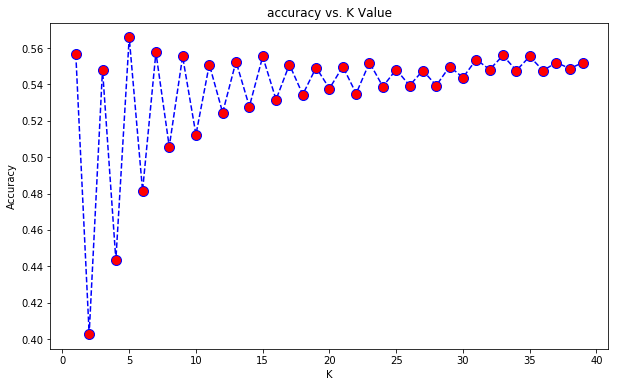

In [62]:
acc =[]

from sklearn import metrics

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, Y_train) 
    predicted = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, predicted))

    
plt.figure(figsize=(10,6))
plt.plot(range (1,40), acc, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy: ",max(acc), "at K=",acc.index(max(acc)))